In [1]:
'''
Author: your name
Date: 2023-09-30 10:03:52
LastEditTime: 2023-09-30 11:15:52
LastEditors: yjr
Description: In User Settings Edit
FilePath: \作图\photo2 copy.py
'''
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd

# 自定义 Nature Machine Intelligence 风格
plt.rcParams.update({
    # 'font.family': 'Times New Roman',
    'font.size': 22,
    'axes.labelsize': 22,
    'axes.titlesize': 24,
    'axes.linewidth': 1,
    'xtick.labelsize': 22,
    'ytick.labelsize': 22,
    'xtick.major.size': 5,
    'ytick.major.size': 5,
    'xtick.major.width': 1,
    'ytick.major.width': 1,
    'legend.fontsize': 10,
    'lines.linewidth': 2,
    'lines.markersize': 8,
    'axes.grid': True,
    'grid.alpha': 0.53,
    'grid.linestyle': '--',
    'axes.spines.top': True,  # 修改此行
    'axes.spines.right': True  # 修改此行
})

palette = sns.color_palette("colorblind")
# cifar10_50
# cifar10_80
# cifar100_50
# cifar100_80
# cinic10_50
# cinic10_80


In [12]:
# 1. cifar10 + vgg5
# EffectInfo = [ # 0,2,1,3,4,5
# 2.281367628,
# 1.606724238,
# 1.856306942,
# 1.165486912,
# 1.006773047,
# -1.177232909,
# -4.723030361,
# ] # vgg5

# result_dir = '/home/dengruijun/data/FinTech/PP-Split/results/inverse-model-results-20240414/VGG5/InverseModelAttack-defense0.1/'
# layer_list = ['layer0', 'layer2', 'layer1', 'layer3', 'layer4','layer5','layer6']  # 'layer5', 'layer6']
# layer_list = [0,2,1,3,4,5,6] # VGG5
# image_name = 'visual-vgg5-cifar10.pdf'

# 2. cifar10 + resnet18
EffectInfo = [
2.956454325,
1.113184901,
1.75749104,
1.261335917,
0.456548282,
0.293637939,
] # resnet18
result_dir = '/home/dengruijun/data/FinTech/PP-Split/results/inverse-model-results-20240414/Resnet18/InverseModelAttack-defense0.1/'
layer_list = ['layer2', 'layer3','layer5', 'layer7', 'layer9', 'layer11']  # 'layer5', 'layer6']
layer_list = [2,3,5,7,9,11] # Resnet18
image_name='visual-resnet18-cifar10.pdf'

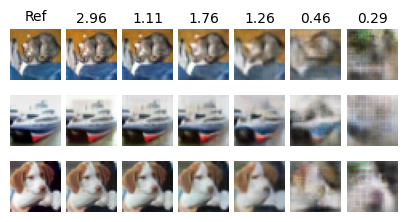

In [14]:

# 展示一张指定的图片
# img_path = result_dir + 'layer0/images/0-inv.png'
# # img_path = result_dir + 'layer0/images/0-ref.png'
# img = mpimg.imread(img_path)
# plt.imshow(img)
# plt.axis('off')  # 隐藏坐标轴
# plt.show()


img_number_list = [0,1,16]
# 原始图片
org_imgs = []
for img_number in img_number_list:
    img_path = result_dir + f'layer{layer_list[0]}/images/' + str(img_number) + '-ref.png'
    img = mpimg.imread(img_path)
    org_imgs.append(img)

# 展示一排指定的 reconstructed 图片 不同的layer
inv_imgs = []
for img_number in img_number_list:
    inv_img_layer = []
    for layer in layer_list:
        img_path = result_dir + f'layer{layer}/images/' + str(img_number) + '-inv.png'
        img = mpimg.imread(img_path)
        inv_img_layer.append(img)
    inv_imgs.append(inv_img_layer)

# 创建一个2x4的子图布局
fig, axes = plt.subplots(len(img_number_list), len(layer_list)+1,figsize=(5,2.5))#  

# origin images
for i, img_number in enumerate(inv_imgs):
    axes[i,0].imshow(org_imgs[i])
    axes[i,0].axis('off')

for i, img_number in enumerate(inv_imgs):
    for j, img_layer in enumerate(img_number):
        axes[i, j+1].imshow(img_layer)
        axes[i, j+1].axis('off')
        # axes[i, j].set_title(f'{layer_list[j]}')

# 文字标题
axes[0,0].set_title('Ref', fontsize=10)
for ax, col in zip(axes[0][1:], EffectInfo):
    # ax.set_title(col, fontsize=22)
    formatted_title = "{:.2f}".format(col)
    ax.text(0.5, 1.2, formatted_title, ha='center', va='center', transform=ax.transAxes, fontsize=10)


# 调整子图间距
plt.subplots_adjust(wspace=0.1, hspace=0.1)


# 调整布局以减少留白
# plt.tight_layout()


# 显示图像
# plt.show()
# 保存为png格式
plt.savefig(image_name, format='pdf',bbox_inches='tight')

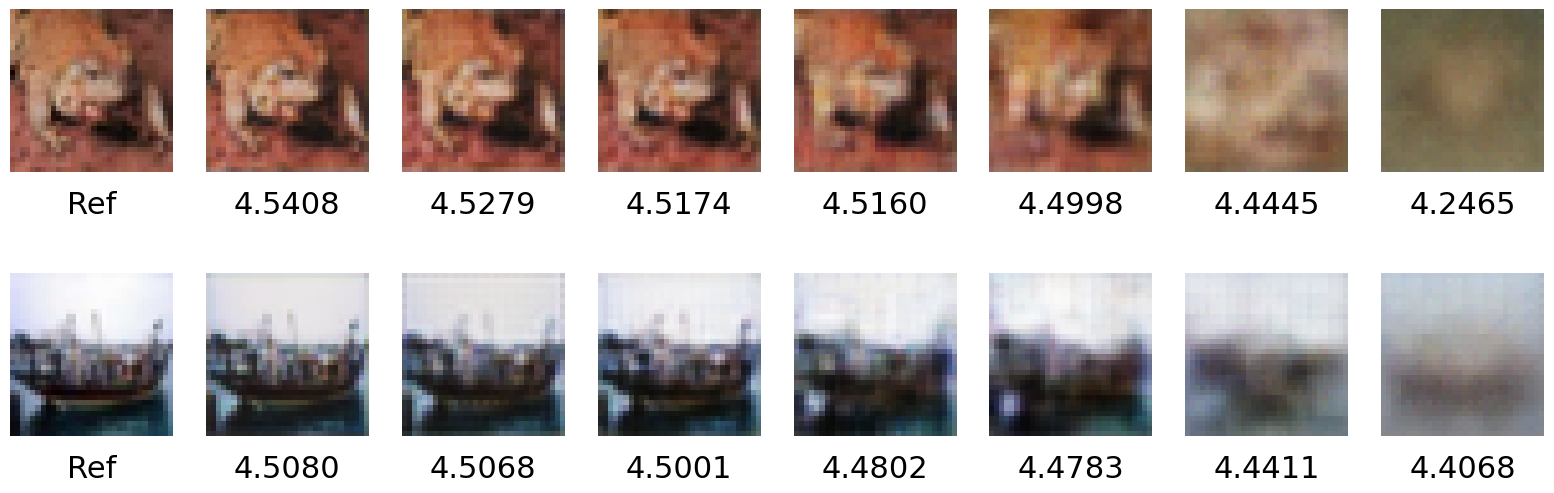

In [4]:
# 7  8  9  13

# 创建一个2x8的子图布局
# fig, axes = plt.subplots(2, 8, figsize=(16, 6))

# 创建一个2x4的子图布局
fig, axes = plt.subplots(2, 8, figsize=(16, 6))


# 循环加载图片并设置标题 reference 
for i, im in enumerate(oimList):
    img = mpimg.imread(img_dir+'layer2/'+ im)
    axes[i, 0].imshow(img)
    axes[i, 0].axis('off')
    axes[i, 0].text(0.5, -0.2, 'Ref', ha='center', va='center', transform=axes[i, 0].transAxes)


# reconstructed images
for j, im in enumerate(imList):
    for i, layer in enumerate(layerList):
        img = mpimg.imread(img_dir+layer +'/'+ im)
        axes[j, i+1].imshow(img)
        axes[j, i+1].axis('off')
        # axes[j, i+1].set_title(ULoss[j][i])
        formatted_title = "{:.4f}".format(ULoss[j][i])
        axes[j, i+1].text(0.5, -0.2, formatted_title, ha='center', va='center', transform=axes[j, i+1].transAxes)
        # axes[j, i+1].set_title(formatted_title, loc='bottom', pad=-15) 
        

# # 添加竖线分隔符
# for i in range(2):
#     axes[i, 4].axvline(x=-5, color='black', linestyle='-', linewidth=5)
# plt.axvline(x=0.5, color='black', linestyle='-', linewidth=3)

plt.tight_layout()
# plt.show()


# 保存为png格式
plt.savefig('photo-111.png', dpi=600, format='png')

# 保存为pdf格式
plt.savefig('photo-111.pdf', dpi=600, format='pdf')